/tmp/ipykernel_3907706/1223960017.py:101: MatplotlibDeprecationWarning:

The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.

/tmp/ipykernel_3907706/1223960017.py:102: MatplotlibDeprecationWarning:

The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.

/tmp/ipykernel_3907706/1223960017.py:103: MatplotlibDeprecationWarning:

The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.



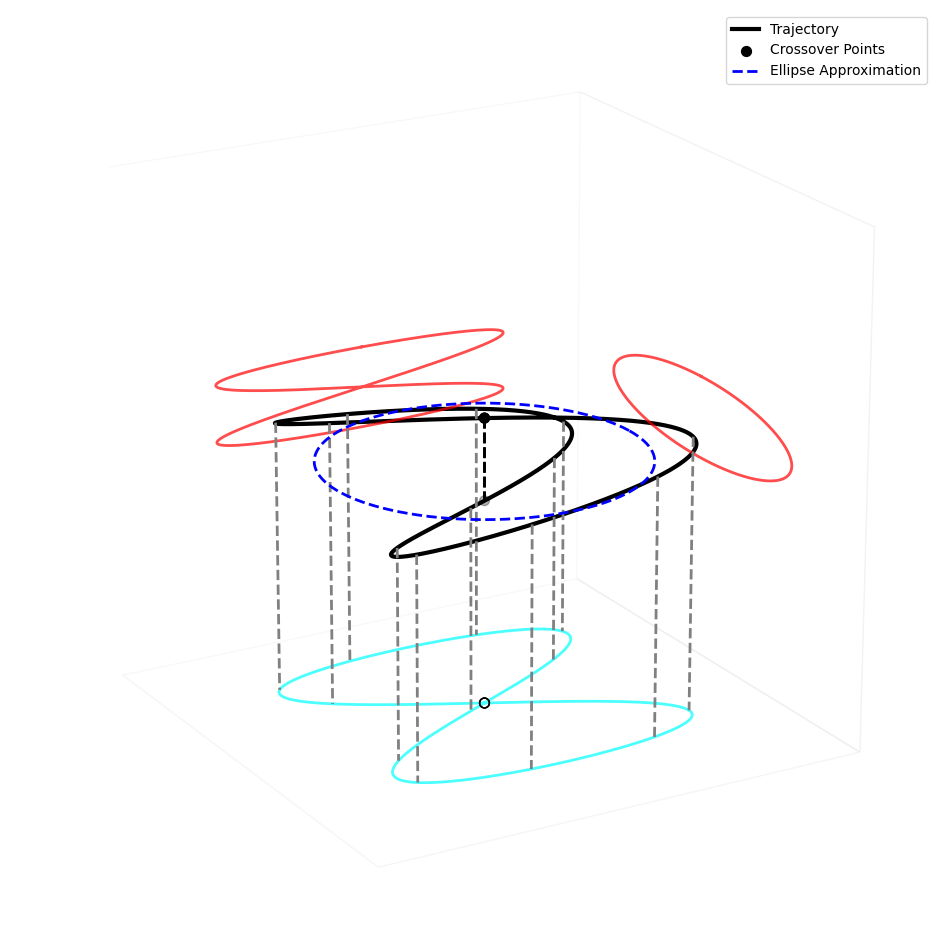

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/tmp/ipykernel_3907706/1223960017.py:177: MatplotlibDeprecationWarning:

The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.

/tmp/ipykernel_3907706/1223960017.py:178: MatplotlibDeprecationWarning:

The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.

/tmp/ipykernel_3907706/1223960017.py:179: MatplotlibDeprecationWarning:

The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.



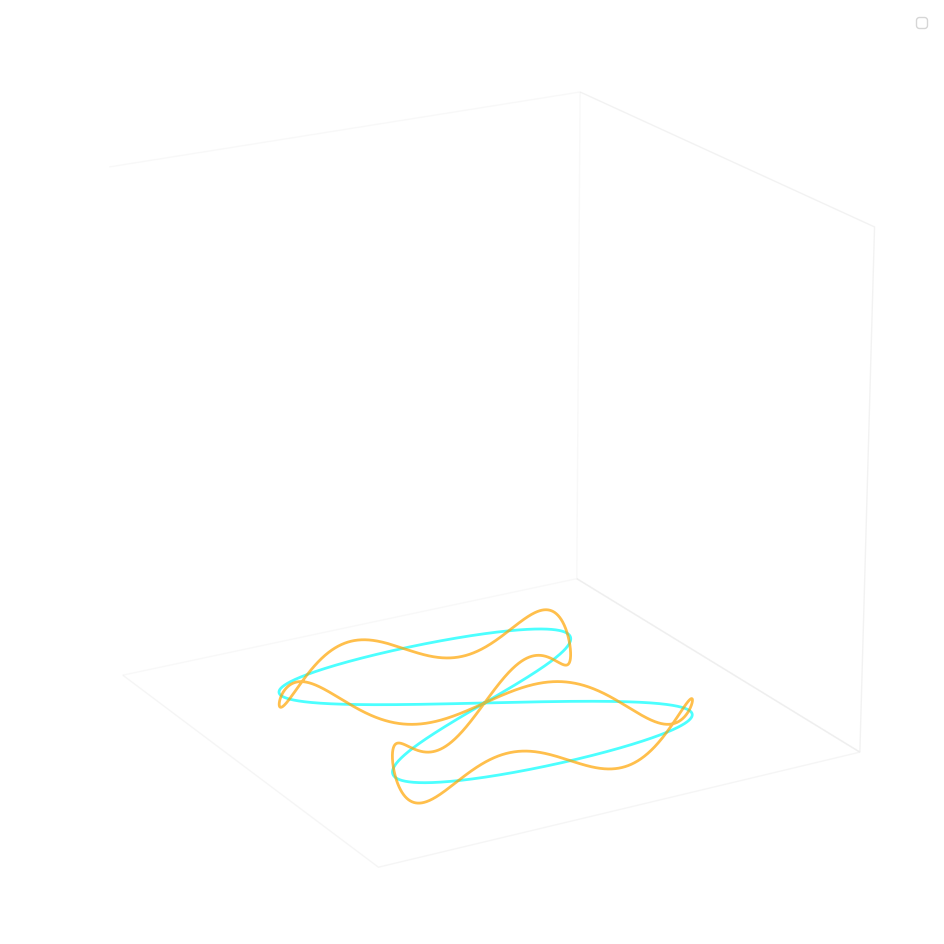

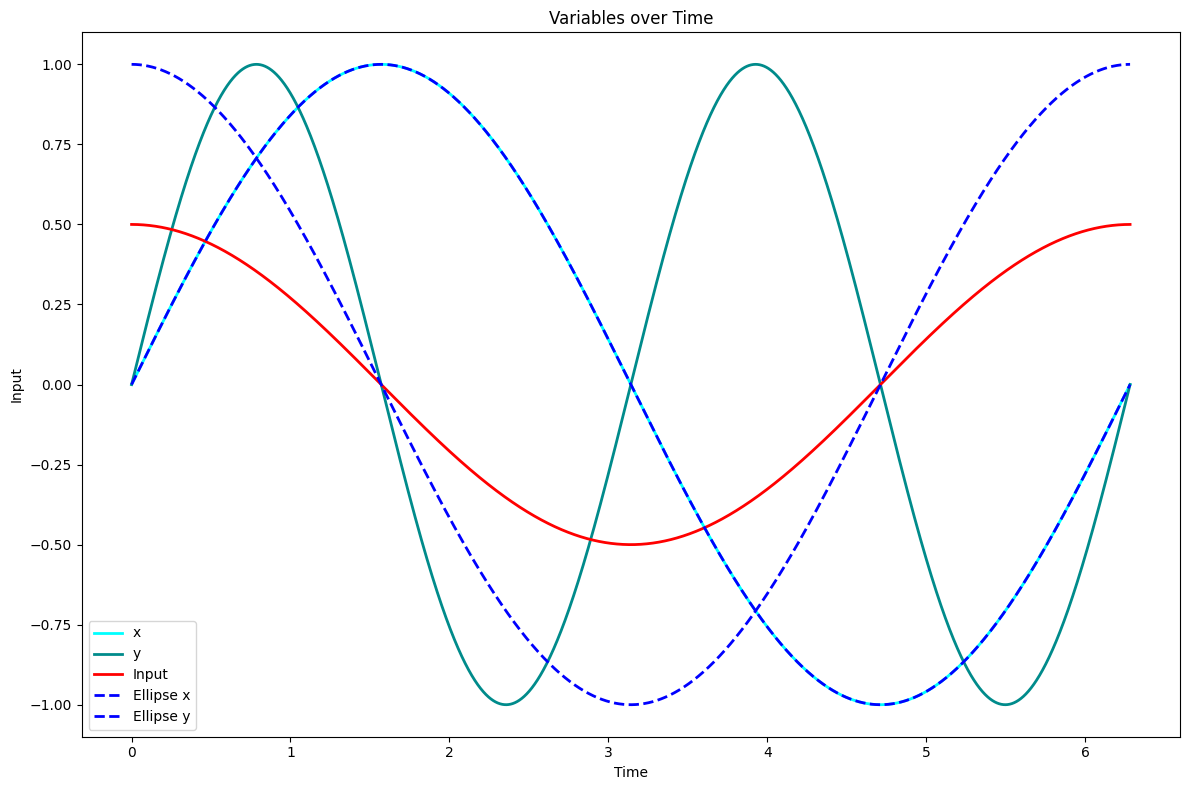

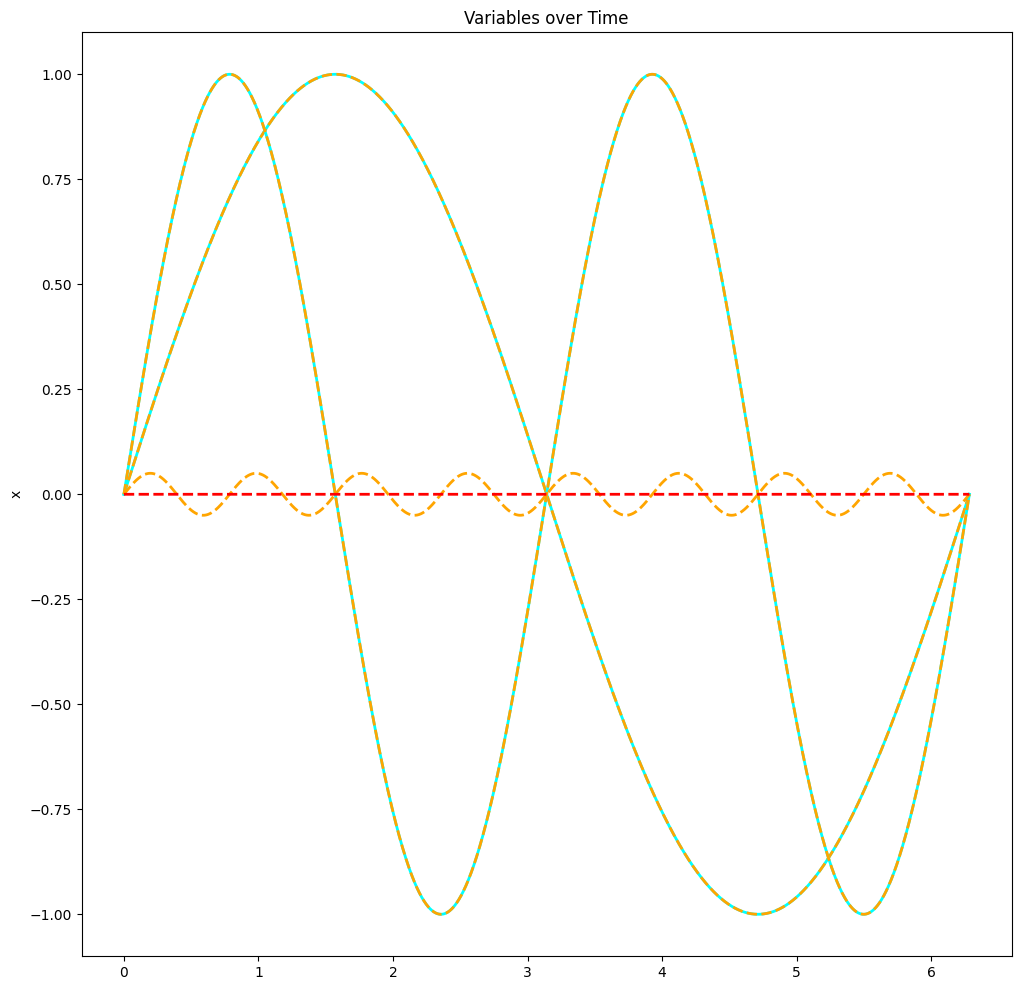

In [101]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Required for 3D plotting

add_underfit = True  # Set to True to add the ellipse approximation
add_extra_features = True

# Time points
t = np.linspace(0, 2 * np.pi, 5000)  # Time from 0 to 2π to cover one period

# Angle theta
theta = t  # θ increases linearly with time

# Compute x, y, z for the figure-8 trajectory
x = np.sin(theta)
y = np.sin(2 * theta)
A = 0.1  # Adjusted amplitude to enhance separation
z = A * np.cos(theta)  # Input function with the same period as the figure-8

# Identify crossover points (θ where sin(θ) = 0 and sin(2θ) = 0)
crossover_thetas = np.array([0, np.pi, 2 * np.pi])
crossover_x = np.sin(crossover_thetas)
crossover_y = np.sin(2 * crossover_thetas)
crossover_z = A * np.cos(crossover_thetas)

# Points for connecting lines to projections
proj_thetas = np.linspace(np.pi/4, 2 * np.pi, 12, endpoint=False)
proj_x = np.sin(proj_thetas)
proj_y = np.sin(2 * proj_thetas)
proj_z = A * np.cos(proj_thetas)

# Create a 3D figure
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

# Plot the main trajectory
ax.plot(x, y, z, color='black', linewidth=3, label='Trajectory')

# Add markers at the crossover points
ax.scatter(crossover_x, crossover_y, crossover_z, color='black', s=50, marker='o', label='Crossover Points')

# Add dashed lines connecting the crossover points
for i in range(len(crossover_x) - 1):
    ax.plot([crossover_x[i], crossover_x[i + 1]],
            [crossover_y[i], crossover_y[i + 1]],
            [crossover_z[i], crossover_z[i + 1]],
            color='black', linewidth=2, linestyle='--')

# Projections onto XY, XZ, and YZ planes
z_proj = min(z) - 0.5
y_proj = max(y) + 0.5
x_proj = min(x) - 0.5

# Projection onto XY plane (z=z_proj)
ax.plot(x, y, [z_proj]*len(z), color='cyan', linewidth=2, alpha=0.7)

# Projection onto XZ plane (y=y_proj)
ax.plot(x, [y_proj]*len(y), z, color='red', linewidth=2, alpha=0.7)

# Projection onto YZ plane (x=x_proj)
ax.plot([x_proj]*len(y), y, z, color='red', linewidth=2, alpha=0.7)

# Add circles at the crossover points on the XY plane projection
ax.scatter(crossover_x, crossover_y, [z_proj]*len(crossover_x), facecolors='none', edgecolors='black', s=50, marker='o')

# Add dotted lines connecting the trajectory to projections at the projection points
for i in range(len(proj_x)):
    # Line to XY plane projection
    ax.plot([proj_x[i], proj_x[i]],
            [proj_y[i], proj_y[i]],
            [proj_z[i], z_proj],
            color='gray', linewidth=2, linestyle='--')

# Set labels
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Input')

# Set axis limits
ax.set_xlim([-1.55, 1.55])
ax.set_ylim([-1.55, 1.55])
ax.set_zlim([-0.6, 0.6])

# Set aspect ratio
ax.set_box_aspect([1, 1, 1])

# Add legend
ax.legend()

# Lines to remove the grey box background
# Remove the panes (background surfaces)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Remove the gridlines
ax.grid(False)

# Remove the axes lines
ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

# Hide the tick marks
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

# Hide the axes labels
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_zlabel('')

# Set the viewing angle
ax.view_init(20, -30)  # default is 30, 30

# =====================
# Add the ellipse approximation if add_underfit is True
if add_underfit:
    # Define the ellipse that approximates the figure-8
    # Parameters of the ellipse
    a = 1.0  # Semi-major axis length along x-axis
    b = 1.0  # Semi-minor axis length along y-axis
    theta_ellipse = np.linspace(0, 2 * np.pi, 500)

    # Ellipse equations
    x_e = a * np.sin(theta_ellipse)
    y_e = b * np.cos(theta_ellipse)

    # Plot the ellipse on the 3D plot (at z = 0)
    ax.plot(x_e, y_e, np.zeros_like(x_e), color='blue', linewidth=2, linestyle='--', label='Ellipse Approximation')

    # Add to legend
    ax.legend()



# Show plot
plt.show()

# Save the plot as a PDF
fig.savefig("figure8_trajectory_matplotlib.pdf", format='pdf')

if add_extra_features:
    fig_extra = plt.figure(figsize=(12, 12))
    ax_extra = fig_extra.add_subplot(111, projection='3d')
    # Projection onto XY plane (z=z_proj)
    sin_signal = 0.05*np.sin(8*t)
    ax_extra.plot(x, y, [z_proj]*len(z), color='cyan', linewidth=2, alpha=0.7)
    ax_extra.plot(x, y, [z_proj]*len(z) + sin_signal, color='orange', linewidth=2, alpha=0.7)
    # Set labels
    ax_extra.set_xlabel('x')
    ax_extra.set_ylabel('y')
    ax_extra.set_zlabel('z')

    # Set axis limits
    ax_extra.set_xlim([-1.55, 1.55])
    ax_extra.set_ylim([-1.55, 1.55])
    ax_extra.set_zlim([-0.6, 0.6])
    # Set aspect ratio
    ax_extra.set_box_aspect([1, 1, 1])

    # Add legend
    ax_extra.legend()

    # Lines to remove the grey box background
    # Remove the panes (background surfaces)
    ax_extra.xaxis.pane.fill = False
    ax_extra.yaxis.pane.fill = False
    ax_extra.zaxis.pane.fill = False

    # Remove the gridlines
    ax_extra.grid(False)

    # Remove the axes lines
    ax_extra.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
    ax_extra.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
    ax_extra.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

    # Hide the tick marks
    ax_extra.set_xticks([])
    ax_extra.set_yticks([])
    ax_extra.set_zticks([])

    # Hide the axes labels
    ax_extra.set_xlabel('')
    ax_extra.set_ylabel('')
    ax_extra.set_zlabel('')

    ax_extra.view_init(20, -30)  # default is 30, 30
    plt.show()
    fig_extra.savefig("figure8_trajectory_matplotlib_extra.pdf", format='pdf')



# =====================
# New section: Plot x, y, z over time
# =====================

# Create a new figure for the time series plots
fig2, axs = plt.subplots(1, 1, figsize=(12, 8), sharex=True)

# Plot x over time
axs.plot(t, x, label='x', linewidth=2, color="cyan")
axs.set_ylabel('x')
axs.set_title('Variables over Time')

# Plot y over time
axs.plot(t, y, label='y', linewidth=2, color="darkcyan")
axs.set_ylabel('y')

# Plot z over time
axs.plot(t, z * 5, label='Input', linewidth=2, color="red")  # Multiplied z by 5 for visibility
axs.set_ylabel('Input')
axs.set_xlabel('Time')

# Add the ellipse approximation to the time series plots if add_underfit is True
if add_underfit:
    # Ellipse variables over time
    x_e_time = a * np.sin(theta)
    y_e_time = b * np.cos(theta)

    # Plot the ellipse variables over time
    axs.plot(t, x_e_time, label='Ellipse x', linewidth=2, linestyle='--', color='blue')
    axs.plot(t, y_e_time, label='Ellipse y', linewidth=2, linestyle='--', color='blue')

    # Adjust legends
    axs.legend()

# Adjust layout
plt.tight_layout()

# Show the time series plots
plt.show()

# Save the time series plots as a PDF
fig2.savefig("variables_over_time.pdf", format='pdf')

if add_extra_features:
    fig_extra2 = plt.figure(figsize=(12, 12))
    ax_extra2 = fig_extra2.add_subplot(111)
    # Plot x over time
    ax_extra2.plot(t, x, label='x', linewidth=2, color="cyan")
    ax_extra2.plot(t, x, label='x', linewidth=2, color="orange", linestyle="--")
    ax_extra2.plot(t, y, label='y', linewidth=2, color="cyan")
    ax_extra2.plot(t, y, label='y', linewidth=2, linestyle='--', color="orange")
    ax_extra2.plot(t, sin_signal, label='z', linewidth=2, linestyle='--', color="orange")  # Multiplied z by 5 for visibility
    ax_extra2.plot(t, np.zeros_like(sin_signal), label='z', linewidth=2, linestyle='--', color="red")  # Multiplied z by 5 for visibility

    ax_extra2.set_ylabel('x')
    ax_extra2.set_title('Variables over Time')

    fig_extra2.savefig("variables_over_time_extra.pdf", format='pdf')

    
